**Introduction**<br>
The music industry has become more popular, and how people listen to music is changing like wildfire. The development of music streaming services has increased the demand for automatic music categorization and recommendation systems.<br>
Spotify, one of the world’s leading music streaming sites, has millions of subscribers and a massive song catalog. Yet, for customers to have a personalized music experience, Spotify must recommend tracks that fit their preferences. Spotify uses machine learning algorithms to guide and categorizes music based on the Genre.<br>
This project will focus on the Spotify Multiclass Genre Classification problem, where we download the Dataset from Kaggle.<br>
Goal: This project aims to develop a model that classifies the Genre that can accurately predict the Genre of a music track on spotify.<br>
**Learning Objectives**<br>
+ To investigate the link between music genres on Spotify and their acoustic characteristics.<br>
+ To create a classification model based on auditory characteristics to predict the genre of a given song.<br>
+ To investigate the distribution of various spotify music genres in the dataset.<br>
+ To clean and preprocess data in order to prepare it for modeling.<br>
+ To assess the categorization model’s performance and improve its accuracy.<br>

**Table of Contents**
+ Prerequisites<br>
+ Project Pipeline<br>
+ Project<br>
+ Conclusion<br>

**Prerequisites**<br>
Before we begin implementation, we must install and import some of the libraries. The libraries listed below are required:
+ Pandas: A library for data manipulation and analysis.
+ NumPy: A scientific computing package used for matrix computations.
+ Matplotlib: A plotting library for the Python programming language.
+ Seaborn: A data visualization library based on matplotlib.
+ Sklearn: A machine learning library for building models for classification
+ TensorFlow: A popular open-source library for building and training deep learning models.

To install these, we run this command.<br>
!pip install pandas    <br>
!pip install numpy<br>
!pip install matplotlib<br>
!pip install seaborn<br>
!pip install sklearn<br>
!pip install tensorflow<br>

**Project Pipeline**<br>
+ Data Preprocessing: Clean and preprocess the “genres_v2” dataset to prepare it for machine learning.<br>
+ Feature Engineering: Extract meaningful features from the audio files that will help us train our model.<br>
+ Model Selection: Evaluate several machine learning algorithms to find the best-performing model.<br>
+ Model Training: Train the selected model on the preprocessed Dataset and evaluate its performance.<br>
+ Model Deployment: Deploy the trained model in an online application that can recommend music tracks on Spotify based on the user’s preferences<br>
So, let’s get started doing some code.<br>


**Project**<br>
First, we need to download the data set. You can download the Dataset from Kaggle. We need to import the necessary libraries to perform our tasks.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import metrics
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.manifold import Isomap, TSNE, MDS
import random

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import warnings 
warnings.simplefilter("ignore")

Load the Dataset<br>
We load the Dataset using pandas read_csv, and the data set contains 42305 rows and 22 columns and consists of 18000+ tracks.


In [ ]:
data = pd.read_csv("/Users/tarakram/Documents/Analytics_vidhya/Solving-Spotify-Multiclass-Genre-Classification-Problem-1/data/genres_v2 2.csv")
data


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


Exploring the Data<br>
I use the ‘iloc’ method to select the rows and columns that form a data frame by their integer index positions. I am choosing the first 20 columns of the df.


In [ ]:
data.iloc[:,:20] 

# this is for the first 20 columns 


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN


In [ ]:
data.iloc[:,20:]
 
# this is for the 21st column

,Unnamed: 0,title
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
42300,20995.0,Euphoric Hardstyle
42301,20996.0,Greatest Hardstyle Playlist
42302,20997.0,Best of Hardstyle 2020
42303,20998.0,Euphoric Hardstyle


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

When you call data.info(), it will print the following information:<br>
+ The number of rows and columns in the data frame.<br>
+ The name of each column, its data type, and the number of non-null values in that column.<br>
+ The total number of non-null values in the data frame.<br>
+ The memory usage of the DataFrame.<br>


In [ ]:
data.nunique()

# number of unique values in our data set.

danceability          890
energy                917
key                    12
loudness            11654
mode                    2
speechiness          1447
acousticness         4602
instrumentalness     4757
liveness             1695
valence              1674
tempo               15606
type                    1
id                  35877
uri                 35877
track_href          35877
analysis_url        35877
duration_ms         26261
time_signature          4
genre                  15
song_name           15439
Unnamed: 0          20780
title                 132
dtype: int64

Data Cleaning<br>
Here, we want to clean our data by removing unnecessary columns that add no value to the prediction.


In [ ]:
df = data.drop(["type","type","id","uri","track_href","analysis_url","song_name",
                "Unnamed: 0","title", "duration_ms", "time_signature"], axis =1)
df


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,hardstyle


We have removed some columns that add no value to this particular problem and put axis = 1, where it drops the columns rather than rows. We are again calling the Data Frame to see the new Data Frame with helpful information.<br>
The df. describe( ) method generates descriptive statistics of a Pandas Data Frame. It provides a summary of the central tendency and dispersion and the shape of the distribution of a dataset.<br>
After running this command, you can see all the descriptive statistics of the Data Frame, like std, mean, median, percentile, min, and max.


In [ ]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000


To display a summary of a Pandas DataFrame or Series, use the df.info() function. It gives Dataset information like the number of rows and columns, the data types of each column, the number of non-null values in each column, and the utilization of the dataset’s memory.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  genre             42305 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 3.9+ MB


In [ ]:
df["genre"].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

axe = sns.histplot(df[“genre”]) generates a histogram of the distribution of values in a Pandas DataFrame named df’s “genre” column. This code may be used to visualize the frequency of some Spotify genres in a music dataset.


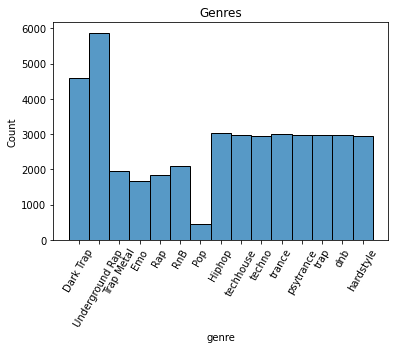

In [ ]:
ax = sns.histplot(df["genre"])
_ = plt.xticks(rotation=60)
_ = plt.title("Genres")

The following ag code eliminates or deletes all rows in a Pandas DataFrame where the value in the “genre” column is equal to “Pop”. The DataFrame’s index is then reset to the range where it starts with 0. Lastly, it computes the correlation matrix of the DataFrame’s remaining columns.<br>
This code helps study a dataset by deleting unnecessary rows and finding correlations between the remaining variables.


In [ ]:
df.drop(df.loc[df['genre']=="Pop"].index, inplace=True)
df = df.reset_index(drop = True)
#df = df.corr()

In [ ]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,-0.324608,-0.013133,-0.218870,0.085789,0.184211,0.070473,-0.065724,-0.196866,0.369169,-0.167563
energy,-0.324608,1.000000,0.045013,0.603140,-0.031562,-0.150872,-0.495804,0.303650,0.231560,-0.013813,-0.023276
key,-0.013133,0.045013,1.000000,-0.006947,-0.250188,-0.031088,-0.004237,0.068760,0.003343,0.029533,-0.010681
loudness,-0.218870,0.603140,-0.006947,1.000000,-0.004879,0.050098,-0.284931,-0.186337,0.167971,0.076700,0.153185
mode,0.085789,-0.031562,-0.250188,-0.004879,1.000000,0.050455,-0.015634,-0.016375,0.008253,0.023070,-0.011819
speechiness,0.184211,-0.150872,-0.031088,0.050098,0.050455,1.000000,0.163345,-0.392013,0.056733,0.224940,0.166511
acousticness,0.070473,-0.495804,-0.004237,-0.284931,-0.015634,0.163345,1.000000,-0.262410,-0.106497,0.101200,0.054707
instrumentalness,-0.065724,0.303650,0.068760,-0.186337,-0.016375,-0.392013,-0.262410,1.000000,-0.017781,-0.252966,-0.208680
liveness,-0.196866,0.231560,0.003343,0.167971,0.008253,0.056733,-0.106497,-0.017781,1.000000,-0.023217,0.029513
valence,0.369169,-0.013813,0.029533,0.076700,0.023070,0.224940,0.101200,-0.252966,-0.023217,1.000000,0.058152


In [ ]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [ ]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
41839,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,hardstyle
41840,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,hardstyle
41841,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,hardstyle
41842,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,hardstyle


The following code sns. heatmap (df, cmap=’coolwarm, annot=True) plt. show() generates a heatmap depicting a Pandas DataFrame df’s correlation matrix.<br>
This code helps to find and display the strength and direction of correlations between variables in a dataset. The heatmap color coding makes it easy to see which pairs of variables are highly correlated and which are not.


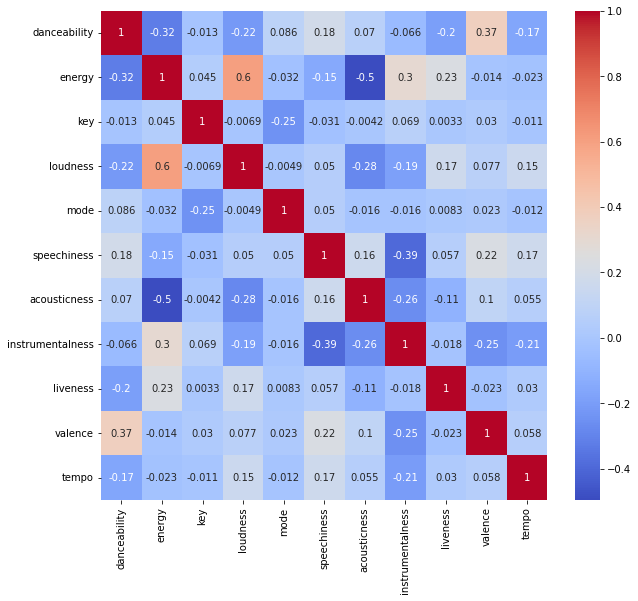

In [ ]:
plt.subplots(figsize=(10,9))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True ) 
plt.show()


The following code picks a subset of columns in a Pandas DataFrame df named x, which contains all columns from the DataFrame’s beginning, including the “tempo” column. Then it chooses the DataFrame’s “genre” as the target variable and assigns it to y.<br>
The x variable represents a Pandas DataFrame with a subset of the original columns, and the y variable represents a Pandas Series with the “genre” column values.<br>
The methods x.unique() and y.unique() retrieve the unique values in the x and y variables, respectively. <br>
These routines can be helpful for determining the number of unique values in the variables of a dataset.


In [ ]:
x = df.loc[:,:"tempo"]
y = df["genre"]

In [ ]:
x

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988
...,...,...,...,...,...,...,...,...,...,...,...
41839,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013
41840,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928
41841,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935
41842,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042


In [ ]:
y

0        Dark Trap
1        Dark Trap
2        Dark Trap
3        Dark Trap
4        Dark Trap
           ...    
41839    hardstyle
41840    hardstyle
41841    hardstyle
41842    hardstyle
41843    hardstyle
Name: genre, Length: 41844, dtype: object

In [ ]:
y.unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance', 'trap',
       'dnb', 'hardstyle'], dtype=object)


The given code generates a grid of distribution plots that allow users to view the distribution of values over several columns in a dataset. Discovering patterns, trends, and outliers in the data by showing the distribution of values in each column. These are helpful and beneficial for exploratory data analysis and finding valuable and potential faults or inaccuracies in a dataset.


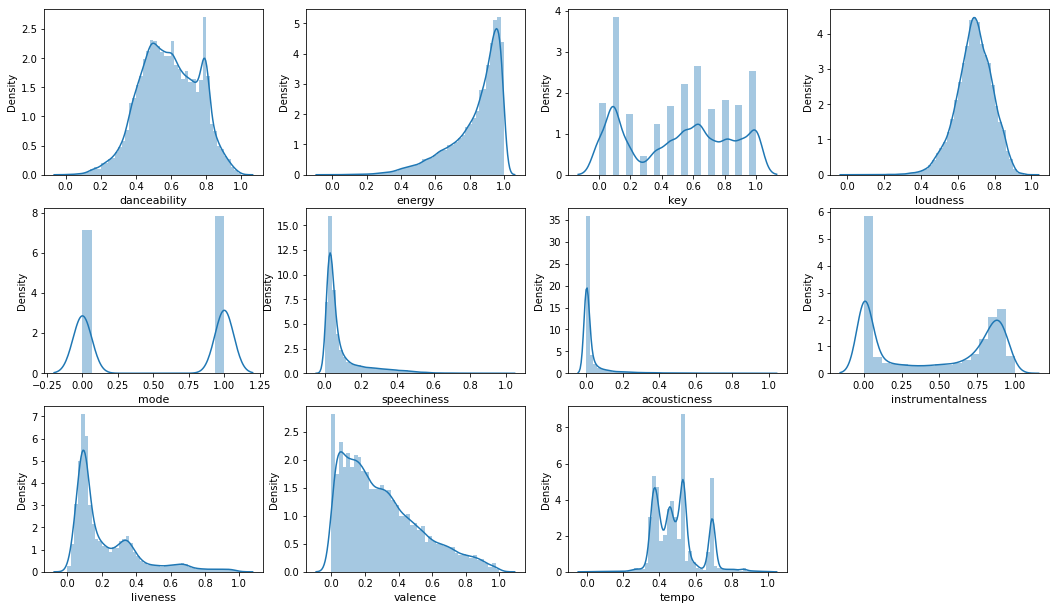

In [ ]:
k=0
plt.figure(figsize = (18,14))
for i in x.columns:
    plt.subplot(4,4, k + 1)
    sns.distplot(x[i])
    plt.xlabel(i, fontsize=11)
    k +=1

**Model Training**
The following code divides a dataset into training and testing subsets. It divides the input variables and target variables into 80% training and 20% testing groups at random.<br>
The descriptive statistics of the training data are then outputted to aid in data exploration and the identification of possible problems.


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size= 0.2, random_state=42, shuffle = True)
xtrain.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [ ]:
xtrain.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000
mean,0.638809,0.763796,5.382972,-6.467526,0.548559,0.137127,0.095507,0.287004,0.214505,0.355343,147.398774
std,0.156886,0.183906,3.666728,2.943751,0.497644,0.126734,0.170971,0.371588,0.176067,0.232911,23.689341
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.023200,0.000001,0.000000,0.010700,0.018700,61.309000
25%,0.523000,0.633000,1.000000,-8.171000,0.000000,0.049250,0.001680,0.000000,0.099600,0.160000,129.962000
50%,0.645000,0.806000,6.000000,-6.251000,1.000000,0.075700,0.016000,0.007240,0.135000,0.319000,144.976000
75%,0.766000,0.923000,9.000000,-4.510000,1.000000,0.195000,0.105000,0.729000,0.295000,0.520000,160.968500
max,0.988000,1.000000,11.000000,3.108000,1.000000,0.944000,0.986000,0.989000,0.981000,0.988000,220.290000


Here we are splitting the data into training and testing (size = 20%), and we are using the describe function to see the descriptive statistics.<br>
The MinMaxScaler() function from the sklearn.preprocessing module is used to do feature scaling. It stores the training data’s column names in the variable ol. The scaler object is then used to fit and convert the xtrain data while changing xtest data.<br>
Lastly, the alternative xtrain and xtest data are converted into pandas DataFrames with the original column names (col). This is a critical step in the preprocessing and standardizing of data for machine learning models.


In [ ]:
col = xtrain.columns

scalerx = MinMaxScaler()

xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)

xtrain = pd.DataFrame(xtrain, columns = col)
xtest = pd.DataFrame(xtest, columns = col)

Here we use the MinMaxScaler, mainly for scaling and normalizing the data.<br>
The following allows us to see the descriptive statistics of the xtrain and xtest<br>


In [ ]:
xtrain.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000
mean,0.621638,0.763738,0.489361,0.737405,0.548559,0.123726,0.096862,0.290196,0.210043,0.347305,0.541510
std,0.169993,0.183950,0.333339,0.080728,0.497644,0.137635,0.173399,0.375721,0.181456,0.240288,0.149007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.496153,0.632911,0.090909,0.690690,0.000000,0.028291,0.001703,0.000000,0.091621,0.145775,0.431831
50%,0.628345,0.805953,0.545455,0.743343,1.000000,0.057016,0.016226,0.007321,0.128105,0.309811,0.526270
75%,0.759454,0.922981,0.818182,0.791087,1.000000,0.186577,0.106490,0.737108,0.293002,0.517177,0.626864
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
xtest.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8.369000e+03,8369.000000,8369.000000,8369.000000,8369.000000
mean,0.622409,0.760911,0.483429,0.736432,0.553113,0.123533,9.721151e-02,0.285188,0.209900,0.345398,0.542275
std,0.170245,0.184347,0.333178,0.081439,0.497201,0.136224,1.705395e-01,0.375950,0.180522,0.238152,0.150267
min,0.000000,0.000000,0.000000,0.198656,0.000000,-0.000543,7.505079e-07,0.000000,0.001443,0.000000,-0.021021
25%,0.497237,0.628910,0.090909,0.690251,0.000000,0.028345,1.783907e-03,0.000000,0.092033,0.144744,0.431303
50%,0.628345,0.799951,0.545455,0.743754,1.000000,0.057450,1.612469e-02,0.005561,0.128105,0.309811,0.526201
75%,0.761621,0.922981,0.727273,0.789908,1.000000,0.186577,1.095325e-01,0.725986,0.295063,0.513051,0.626685
max,0.993499,1.000000,1.000000,1.001097,1.000000,1.002172,1.002028e+00,0.995956,1.007214,0.990715,0.999535


The LabelEncoder() function from the sklearn.preprocessing package is used to encode labels. It uses the fit transform() and transform() routines to encode the category target variables (ytrain and ytest) into numerical values.<br>
The training and testing data for input (x) and target (y) variables are then concatenated. The numerical labels are then inversely transformed into their original category values (y train, y test, and y org).
Next, we use the np.unique() method, which returns the individual categories in the training data.<br>
Lastly, using the seaborn library generates a heatmap graphic to illustrate the relationship between the input characteristics. This is a critical stage when we examine and prepare data for machine-learning models.

In [ ]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

In [ ]:
x = pd.concat([xtrain, xtest], axis = 0)
y = pd.concat([pd.DataFrame(ytrain), pd.DataFrame(ytest)], axis = 0)

In [ ]:
y_train = le.inverse_transform(ytrain)
y_test = le.inverse_transform(ytest)
y_org = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)], axis = 0)

In [ ]:
np.unique(y_train)

array(['Dark Trap', 'Emo', 'Hiphop', 'Rap', 'RnB', 'Trap Metal',
       'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse',
       'techno', 'trance', 'trap'], dtype=object)

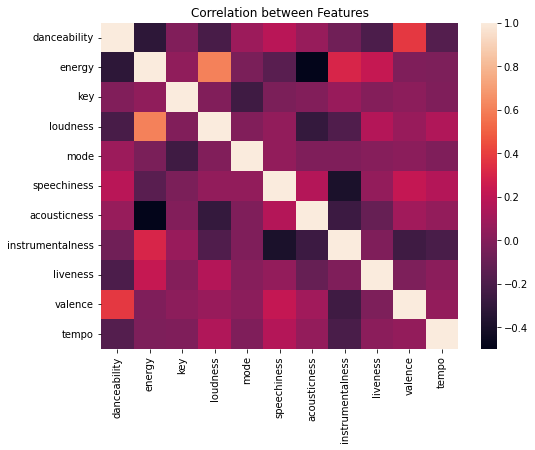

In [ ]:
plt.subplots(figsize=(8,6))
ax = sns.heatmap(xtrain.corr()).set(title = "Correlation between Features")

PCA is a popular dimensionality reduction approach that may assist in decreasing the complexity of large datasets and increasing the performance of machine learning models.<br>
With input data x, the algorithm uses PCA to minimize the number of features to two parts that explain the variation. The reduced Dataset is shown on a 2D scatter plot, with dots colored by class labels in y. This aids in visualizing the dividing of some classes in the reduced feature space.


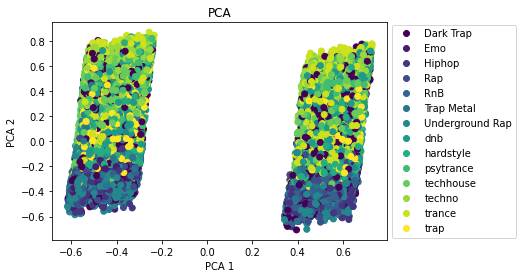

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x, y)
plot_pca = plt.scatter(x_pca[:,0], x_pca[:,1], c=y)
handles, labels = plot_pca.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
_ = plt.title("PCA")

t-SNE is a popular nonlinear dimensionality reduction approach that may assist in decreasing the complexity of large datasets and improve the performance of machine learning models.<br>
Using t-Distributed Stochastic Neighbor Embedding (t-SNE) on the input data x reduces the number of features in the high-dimensional space to 2D while maintaining similarity between Data points.<br>
A 2D scatter plot shows the reduced Dataset, with dots colored according to their y-class labels. It helps visualize the division of some classes in the reduced feature space.


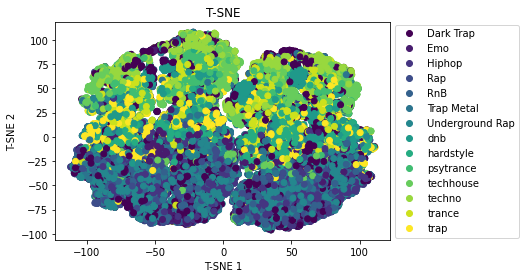

In [ ]:
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x, y)
plot_tsne = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y)
handles, labels = plot_tsne.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("T-SNE 1")
plt.ylabel("T-SNE 2")
_ = plt.title("T-SNE")

SVD is a popular dimensionality reduction approach that may assist in decreasing the complexity of large datasets and increasing the performance of machine learning models.<br>
The following code applies Singular Value Decomposition (SVD) on the input data x with n components=2, reducing the number of input features to two that explain the most variance in the data. The reduced Dataset is then shown on a 2D scatter plot, with the dots colored based on their y-class labels.<br>
This facilitates visualizing the division of multiple classes in the reduced feature space, and the scatter plot is made with the matplotlib tool.


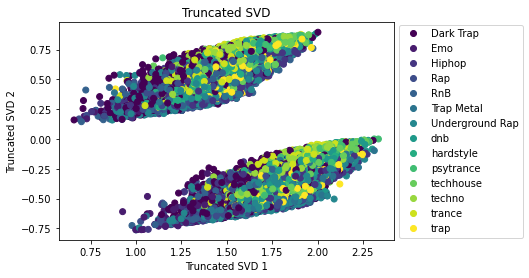

In [ ]:
svd = TruncatedSVD(n_components=2)
x_svd = svd.fit_transform(x, y)
plot_svd = plt.scatter(x_svd[:,0], x_svd[:,1], c=y)
handles, labels = plot_svd.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("Truncated SVD 1")
plt.ylabel("Truncated SVD 2")
_ = plt.title("Truncated SVD")

LDA is a popular dimensionality reduction approach that can increase machine learning model performance by decreasing the influence of irrelevant information.<br>
The following code does Linear Discriminant Analysis (LDA) on the input data x with n components=2, which reduces the number of input features to two linear discriminants that maximize the division between the different classes in the data.<br>
The reduced Dataset is then shown on a 2D scatter plot, with the dots colored based on their y-class labels. This aids in visualizing the division of some classes in the reduced feature space.


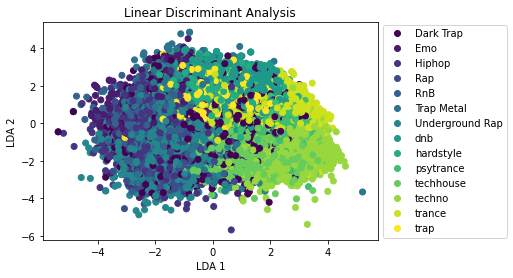

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit_transform(x, y.values.ravel())
plot_lda = plt.scatter(x_lda[:,0], x_lda[:,1], c=y)
handles, labels = plot_lda.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
_ = plt.title("Linear Discriminant Analysis")

The following code substitutes some values in a Data Frame column called ‘genre’ with the new deal ‘Rap.’ Specifically, it replaces the values “Trap Metal,” “Underground Rap,” “Emo,” “RnB,” etc., with “Rap.” This is useful for grouping genres under a single name for analysis or modeling.


In [ ]:
df = df.replace("Trap Metal", "Rap")
df = df.replace("Underground Rap", "Rap")
df = df.replace("Emo", "Rap")
df = df.replace("RnB", "Rap")
df = df.replace("Hiphop", "Rap")
df = df.replace("Dark Trap", "Rap")

The code below generates a histogram using the seaborn library to illustrate the variable “genre” distribution in the input dataset df. The figure has been rotated by 80 degrees to improve the visibility of the x-axis labels. “Genres” is a title.


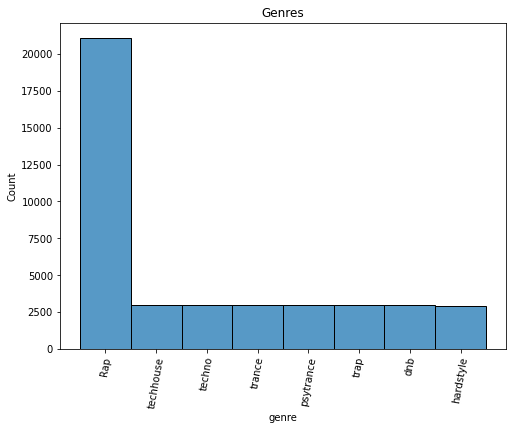

In [ ]:
plt.subplots(figsize=(8,6))
ax = sns.histplot(df["genre"])
_ = plt.xticks(rotation=80)
_ = plt.title('Genres')

The provided code removes the rows from the Data Frame. Specifically, it eliminates rows with a frequency of 0.85 where the genre column value is “Rap,” using a random number generator.<br>
The rows to be discarded are saved in a list of rows dropped before being removed from the Data Frame using the drop function. The code then prints a histogram of the remaining genre values with the seaborn plot function and changes the title and rotation of the x-axis labels with matplotlib’s title and xticks methods.


In [ ]:
rows_drop = []
for i in range(len(df)):
    if df.iloc[i]['genre'] == 'Rap':
        if random.random()<0.85:
            rows_drop.append(i)
df.drop(index = rows_drop,  inplace=True)

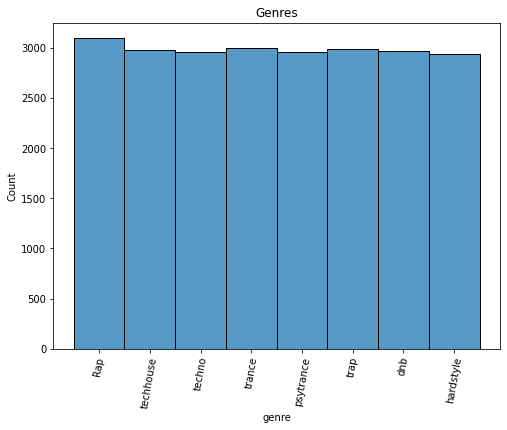

In [ ]:
plt.subplots(figsize=(8,6))
ax = sns.histplot(df["genre"])
_ = plt.xticks(rotation=80)
_ = plt.title("Genres")

The code provided preprocesses the data. The first step is to divide the input data into training and testing sets using the Sklearn library’s train test split function.<br>
It then adjusts the numerical characteristics in the supplied data using the MinMaxScaler function from the same package. The code encodes the category target variable using the preprocessing module’s LabelEncoder function.<br>
As a result, the training and testing sets are preprocessed previously are merged into a single dataset that the machine learning algorithm can process.


In [ ]:
x = df.loc[:,:"tempo"]
y = df["genre"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, 
                                       random_state=42, shuffle = True)

col = xtrain.columns
scalerx = MinMaxScaler()

xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)

xtrain = pd.DataFrame(xtrain, columns = col)
xtest = pd.DataFrame(xtest, columns = col)
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

x = pd.concat([xtrain, xtest], axis = 0)
y = pd.concat([pd.DataFrame(ytrain), pd.DataFrame(ytest)], axis = 0)

y_train = le.inverse_transform(ytrain)
y_test = le.inverse_transform(ytest)
y_org = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)], axis = 0)


This code creates two early stopping callbacks for model training, one based on validation loss and the other on validation accuracy. <br>
Keras’ Sequential API makes a NN model with various connected layers using the ReLU activation function, batch normalization, and dropout regularisation. The summary of the model is printed on the console.<br>
The final output layer outputs class probabilities using the softmax activation function. The summary of the model is printed on the console.


In [ ]:
early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                               patience = 10, restore_best_weights = True)
early_stopping2 = keras.callbacks.EarlyStopping(monitor = "val_accuracy", 
                                               patience = 10, restore_best_weights = True)

model = keras.Sequential([
    keras.layers.Input(name = "input", shape = (xtrain.shape[1])),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(max(ytrain)+1, activation = "softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

The following code block uses Keras to compile and train a neural network model. The model is a sequential model with multiple dense layers with relu activation function, batch normalization, and dropout regularisation.<br>
“sparse categorical cross entropy” is the loss function utilized. At the same time, “Adam” is the optimizer. The model is trained for 100 epochs, with callbacks that end early based on validation loss and accuracy.


In [ ]:
model.compile(optimizer = keras.optimizers.Adam(),
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

model_history = model.fit(xtrain, ytrain,
                epochs = 100,
                verbose = 1, batch_size = 128,
                validation_data = (xtest, ytest),
                callbacks = [early_stopping1, early_stopping2])


Epoch 1/100
150/150 [==============================] - 3s 8ms/step - loss: 1.0214 - accuracy: 0.6466 - val_loss: 2.1865 - val_accuracy: 0.2209
Epoch 2/100
150/150 [==============================] - 1s 7ms/step - loss: 0.6060 - accuracy: 0.7852 - val_loss: 2.3242 - val_accuracy: 0.3269
Epoch 3/100
150/150 [==============================] - 1s 8ms/step - loss: 0.5278 - accuracy: 0.8083 - val_loss: 1.1145 - val_accuracy: 0.5879
Epoch 4/100
150/150 [==============================] - 2s 12ms/step - loss: 0.4967 - accuracy: 0.8217 - val_loss: 0.4848 - val_accuracy: 0.8241
Epoch 5/100
150/150 [==============================] - 2s 12ms/step - loss: 0.4735 - accuracy: 0.8280 - val_loss: 0.4162 - val_accuracy: 0.8519
Epoch 6/100
150/150 [==============================] - 1s 8ms/step - loss: 0.4620 - accuracy: 0.8315 - val_loss: 0.4395 - val_accuracy: 0.8343
Epoch 7/100
150/150 [==============================] - 1s 7ms/step - loss: 0.4550 - accuracy: 0.8372 - val_loss: 0.4078 - val_accuracy: 0.85

The training data is sent as xtrain and ytrain, whereas the validation data is sent as xtest and ytest. The training history of the model is saved in the model history variable.


In [ ]:
print(model.evaluate(xtrain, ytrain))
print(model.evaluate(xtest, ytest))

597/597 [==============================] - 1s 2ms/step - loss: 0.3249 - accuracy: 0.8829
[0.32488009333610535, 0.882925808429718]
150/150 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8735
[0.37544116377830505, 0.8735078573226929]


The following code generates a plot using matplotlib; on the x_axis, we have the epoch, and on the y_axis, we have the sparse Categorical Cross Entropy.


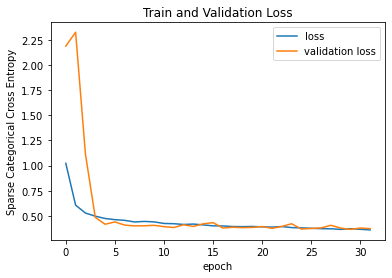

In [ ]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.title("Train and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Sparse Categorical Cross Entropy")
plt.show()

Same as above, but here we are plotting between the epoch and the accuracy.


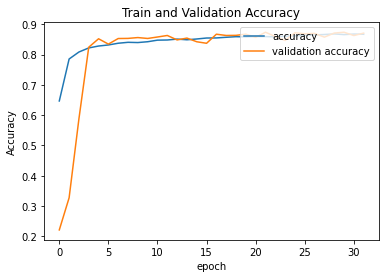

In [ ]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.legend(["accuracy", "validation accuracy"], loc ="upper right")
plt.title("Train and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
ypred = model.predict(xtest).argmax(axis=1)

150/150 [==============================] - 0s 2ms/step


The following code evaluates the classification metrics on the test and ypred, where we can see the precision, recall, and F1score. Based on the values, we can proceed with our model.


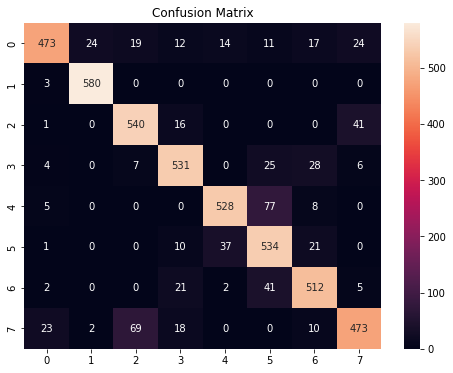

In [ ]:
plt.subplots(figsize=(8,6))
cf_matrix = metrics.confusion_matrix(ytest, ypred)
_ = sns.heatmap(cf_matrix, fmt=".0f", annot=True)
_ = plt.title("Confusion Matrix")

Finally, we do the model Evaluation.<br>
**Model Evaluation**<br>
The following code evaluates the classification metrics on the test and ypred, where we can the precision, recall, F1score. Based on the values we can proceed with our model.


In [ ]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       594
           1       0.96      0.99      0.98       583
           2       0.85      0.90      0.88       598
           3       0.87      0.88      0.88       601
           4       0.91      0.85      0.88       618
           5       0.78      0.89      0.83       603
           6       0.86      0.88      0.87       583
           7       0.86      0.79      0.83       595

    accuracy                           0.87      4775
   macro avg       0.88      0.87      0.87      4775
weighted avg       0.88      0.87      0.87      4775

